# Table of Contents

#### 1. Import libraries and data
#### 2. Data Cleaning
#### 3. Data prep for regression analysis
            Yield vs Rainfall (mm)
            Yield vs Temperature (C)
            Yield vs Days to Harvest
            Yield vs Weather Condition
            Yield vs Fertilizer Use
            Yield vs Irrigation Use
#### 4. Hypothesis
            Null Hypothesis
            Alternative Hypothesis
#### 5. Reshape the variables into NumPy arrays
#### 6. Split the data into two sets: a training set and a test set
#### 7. Run the linear regression on the data
            Training Set
            Test Set Prediction
#### 8. Create a plot that shows the regression line on the test set
#### 9. Interpretation of model performance statistics
            Slope
            MSE
            R2 Score
            Calculating the p-value
#### 10. Compare the predicted y values with the actual y values in a dataframe#### 11. Model perfomance and possible bias


## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# create shortcut path
path = r"C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis"

In [3]:
# import data set
df_crop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'crop_yield_v2.pkl'))

In [10]:
df_crop.shape

(1000000, 13)

In [12]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
 10  Rainfall_group          1000000 non-null  object 
 11  Temperature_range       1000000 non-null  object 
 12  Harvest_range           1000000 non-null  object 
dtypes: bool(2), float64(3), int64(1), object(7)
memory usage: 

In [14]:
df_crop.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Rainfall_group,Temperature_range,Harvest_range
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,Very High,Warm,Extended Harvest
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,Very High,Cool,Extended Harvest
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,Very Low,Warm,Long-Term Harvest
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,Very High,Cool,Extended Harvest
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,High,Hot,Long-Term Harvest


In [16]:
df_crop.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649518
std,259.851320,7.220608,25.953412,1.696443
min,100.000896,15.000034,60.000000,0.000000
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


## 2. Data Cleaning

In [20]:
# check for missing values

df_crop.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
Rainfall_group            0
Temperature_range         0
Harvest_range             0
dtype: int64

In [22]:
# check for duplicates

dups = df_crop.duplicated()

In [24]:
dups.shape 

(1000000,)

No duplicates

## 3. Data prep for regression analysis

### Yield vs Rainfall (mm)

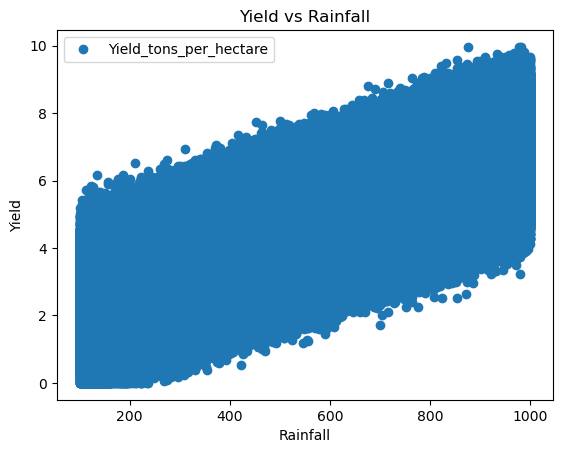

In [85]:
# create a scatterplot using matplotlib for rainfall and yield

df_crop.plot(x = 'Rainfall_mm', y='Yield_tons_per_hectare',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Yield vs Rainfall')  
plt.xlabel('Rainfall')  
plt.ylabel('Yield')  
plt.show()

There looks to be a positive correlation between yield and rainfall

### Yield vs Temperature (C)

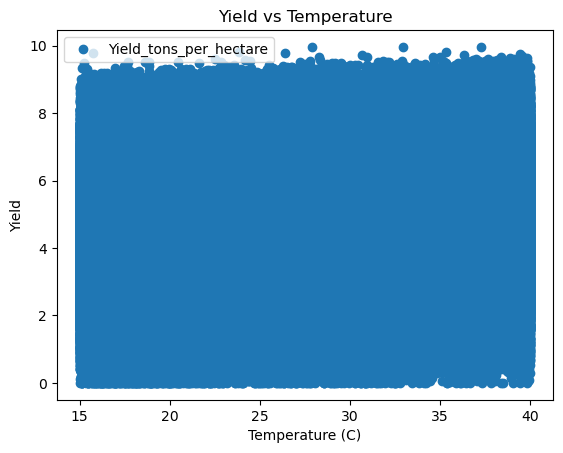

In [87]:
# create a scatterplot using matplotlib for rainfall and temperature

df_crop.plot(x = 'Temperature_Celsius', y='Yield_tons_per_hectare',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Yield vs Temperature')  
plt.xlabel('Temperature (C)')  
plt.ylabel('Yield')  
plt.show()

There is no correlation between yield and temperature as the points encompass the entire scatterplot.

### Yield vs Days to Harvest

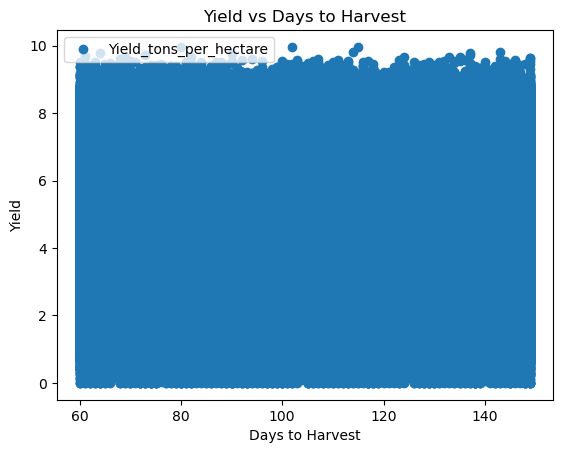

In [89]:
# create a scatterplot using matplotlib for rainfall and days to harvest

df_crop.plot(x = 'Days_to_Harvest', y='Yield_tons_per_hectare',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Yield vs Days to Harvest')  
plt.xlabel('Days to Harvest')  
plt.ylabel('Yield')  
plt.show()

There is no correlation between yield and day to harvest as the points encompass the entire scatterplot.

## Yield vs Weather Condition

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


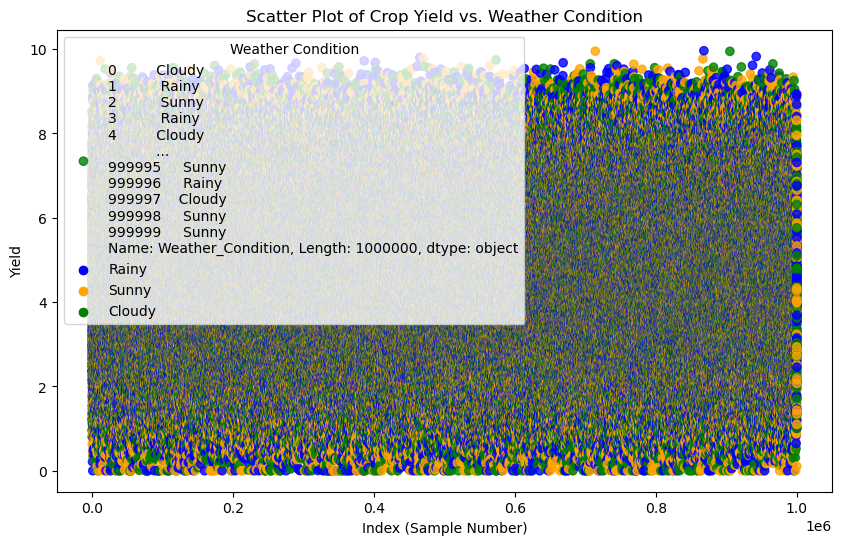

In [44]:
# Assign colors to each weather condition
colors = {'Rainy': 'blue', 'Sunny': 'orange', 'Cloudy': 'green'}

# Map colors based on the weather condition column
df_crop['Color'] = df_crop['Weather_Condition'].map(colors)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_crop.index, df_crop['Yield_tons_per_hectare'], c=df_crop['Color'], label=df_crop['Weather_Condition'], alpha=0.8)

# Add labels and title
plt.xlabel('Index (Sample Number)')
plt.ylabel('Yield')
plt.title('Scatter Plot of Crop Yield vs. Weather Condition')

# Create a custom legend
for condition, color in colors.items():
    plt.scatter([], [], color=color, label=condition)
plt.legend(title='Weather Condition')

# Show the plot
plt.show()

There appears to be no correlation between yield and weather condition as the data points encompass the entire data set. I am not sure if I plotted the code correctly though.

I will be running an analysis on Yield vs Rainfall as it was the only trend of a correlation I saw.

## Yield vs Fertilizer Usage

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


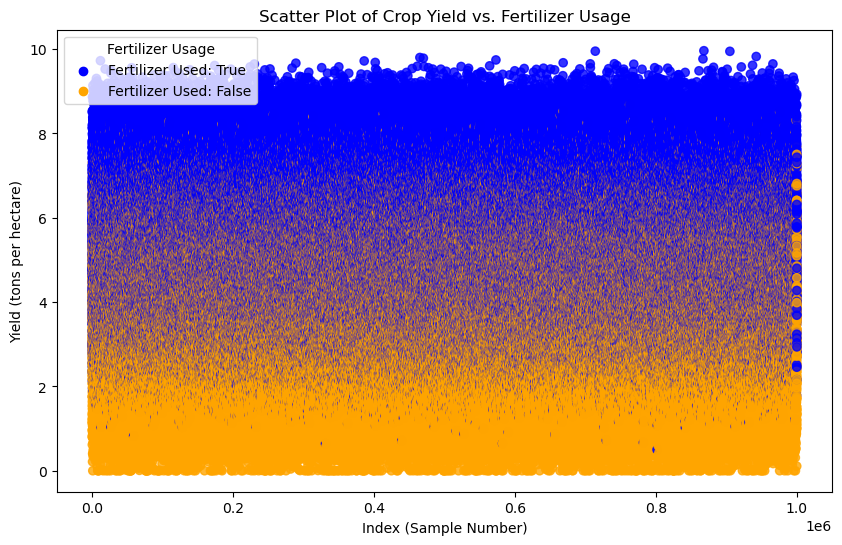

In [60]:
# Assign colors to each fertilizer usage condition
colors_fert = {True: 'blue', False: 'orange'}

# Map colors based on the 'Fertilizer_Used' column
df_crop['Color_Fert'] = df_crop['Fertilizer_Used'].map(colors_fert)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_crop.index, df_crop['Yield_tons_per_hectare'], c=df_crop['Color_Fert'], alpha=0.8)

# Add labels and title
plt.xlabel('Index (Sample Number)')
plt.ylabel('Yield (tons per hectare)')
plt.title('Scatter Plot of Crop Yield vs. Fertilizer Usage')

# Create a custom legend
for condition, color in colors_fert.items():
    plt.scatter([], [], color=color, label=f'Fertilizer Used: {condition}')
plt.legend(title='Fertilizer Usage')

# Show the plot
plt.show()

The scatterplot above shows that higher yields do come from a fertilized crop, however I am not sure this is the appropriate graph to showcase this relationship.

### Yield vs Irrigation Usage

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


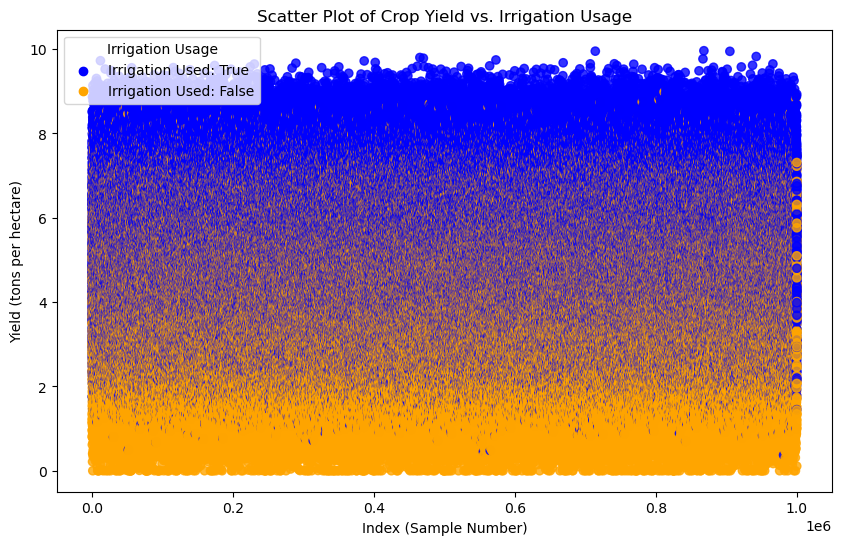

In [70]:
# Assign colors to each fertilizer usage condition
colors_irrig = {True: 'blue', False: 'orange'}

# Map colors based on the 'Fertilizer_Used' column
df_crop['Color_Irrig'] = df_crop['Irrigation_Used'].map(colors_irrig)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_crop.index, df_crop['Yield_tons_per_hectare'], c=df_crop['Color_Irrig'], alpha=0.8)

# Add labels and title
plt.xlabel('Index (Sample Number)')
plt.ylabel('Yield (tons per hectare)')
plt.title('Scatter Plot of Crop Yield vs. Irrigation Usage')

# Create a custom legend
for condition, color in colors_irrig.items():
    plt.scatter([], [], color=color, label=f'Irrigation Used: {condition}')
plt.legend(title='Irrigation Usage')

# Show the plot
plt.show()

The scatterplot above shows that higher yields do come from a irrigated crop, however I am not sure this is the appropriate graph to showcase this relationship.

## 4. Hypothesis

### Null Hypothesis

There is no significant relationship between the amount of rainfall a crop receives and its yield. In other words, increased rainfall does not result in a higher crop yield

### Alternative Hypothesis

There is a significant positive relationship between the amount of rainfall a crop receives and its yield. In other words, increased rainfall is associated with higher crop yield.

## 5. Reshape the variables into NumPy arrays

In [93]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_crop['Rainfall_mm'].values.reshape(-1,1)
y = df_crop['Yield_tons_per_hectare'].values.reshape(-1,1)

In [95]:
X

array([[897.07723911],
       [992.67328162],
       [147.99802529],
       ...,
       [867.36204622],
       [492.81285654],
       [180.93618014]])

In [97]:
y

array([[6.55581626],
       [8.52734091],
       [1.12744334],
       ...,
       [5.76318192],
       [2.07015871],
       [2.93724319]])

## 6. Split the data into two sets: a training set and a test set

In [102]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 7. Run the linear regression on the data

In [105]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [107]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [109]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### Training Set

In [124]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [126]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [128]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00499747]]
Mean squared error:  1.19595402736061
R2 score:  0.5847362770066358


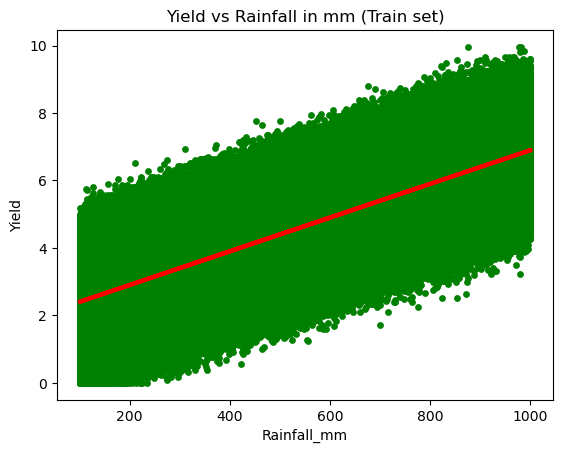

In [130]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Yield vs Rainfall in mm (Train set)')
plot_test.xlabel('Rainfall_mm')
plot_test.ylabel('Yield')
plot_test.show()

### Test Set Prediction

In [137]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.064576,3.036539
1,3.962586,4.962576
2,6.924091,6.660666
3,5.757990,4.516553
4,6.826353,5.990729
5,4.943450,5.208040
6,5.180929,6.629354
7,4.028235,4.911656
8,3.736087,5.070330
9,6.305094,5.747751


## 8. Create a plot that shows the regression line on the test set.

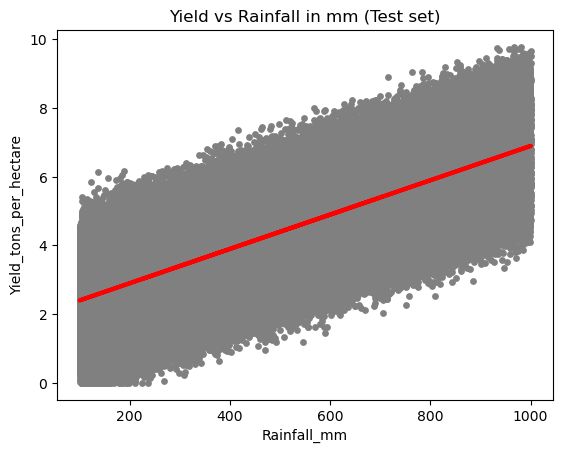

In [122]:
# Create a plot that shows the regression line from the model on the training set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Yield vs Rainfall in mm (Test set)')
plot_test.xlabel('Rainfall_mm')
plot_test.ylabel('Yield_tons_per_hectare')
plot_test.show()

In [113]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [115]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00499747]]
Mean squared error:  1.1937896758088589
R2 score:  0.5844904139494023


## 9. Interpretation of model performance statistics

### Slope: ~0.005

A slope of 0.005 suggests that for each additional millimeter of rainfall, the crop yield increases by 0.005 tons per hectare of yield. This is a positive relationship between rainfall and yield, meaning as rainfall increases so does crop yield.

### MSE: 1.19

An MSE of 1.19 suggests that the average squared difference between the observed yield and predicted yield is 1.19 tons per hectare. A lower MSE value would indicate a better fit of the model to the data.

### R2 Score: 0.58

An R2 values of 0.58 means that 58% of the variation in crop yield can be explained by changes in rainfall. This is a moderate relationship, indicating that rainfall is a significant factor, but there may be other factors affecting crop yield such as soil type, region, or the use of fertilizer and irrigation.

### Overall

The model suggets a postivie relationship between the two variables with rainfall explaining for 58% of the variability in yield. The remaining 42% of variation may be due to other factors. The model fits well, but further analysis of the additional variables is needed to improve its accuracy.

### Calculating the p-value

In [8]:
from scipy.stats import pearsonr

# Assuming df_crop is your DataFrame and contains 'Rainfall_mm' and 'Yield_tons_per_hectare' columns
rainfall = df_crop['Rainfall_mm']  # Extract the 'Rainfall_mm' column
yield_data = df_crop['Yield_tons_per_hectare']  # Extract the 'Yield_tons_per_hectare' column

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(rainfall, yield_data)

print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.764633291026112
P-value: 0.0


## 10 .Compare the predicted y values with the actual y values in a dataframe

The model shows a reasonable level of accuracy, with many predicted values close to the actual ones. There are some underestimates where the actual value (8.80) is much higher than the predicted (6.71), and overestimates where the actual value (4.58) is less than the predicted value (6.75).

## 11. Model perfomance and possible bias

- The model performed fairly well with an R2 score of 0.58 indicating a moderate relationship, and the slope provided some insight for each additional millimeter of rain there is an increase in 0.005 hectare of yield increase. The model needs to include the additional variables to improve its usability, where I think fertilizer and irrigation use will have the largest contribution to its accuracy.

- With the data set being a combination of real and synthetic data, there are a handful of biases that could occur. One being that the synthetic data could misrepresent the true variability and characteristics of the variables in the dataset. There can be distribution bias where the synthetic data may not follow the same distribution as the real data leading to artifial patterns that don't exist in reality. Overfitting bias can occur if the synthetic data is filling in gaps to enhance the data, leading to the data becoming too tailored to find specific patterns or distribution. Finally, there is the chance of confirmation bias occuring where the synthetic data that was generated could have been done so with a specific assumption or goal in mind to confirm a hypothesis or expected trend. This would lead to a misleading conclusion.